In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib import colors

%config InlineBackend.figure_format = 'retina'

# Netflix Red Hex: 
# #e50914

# Hulu Green Hex:
# #1DB954

# USF hex (gold, grey, green):
# #f7b512
# #75787b
# #205c40

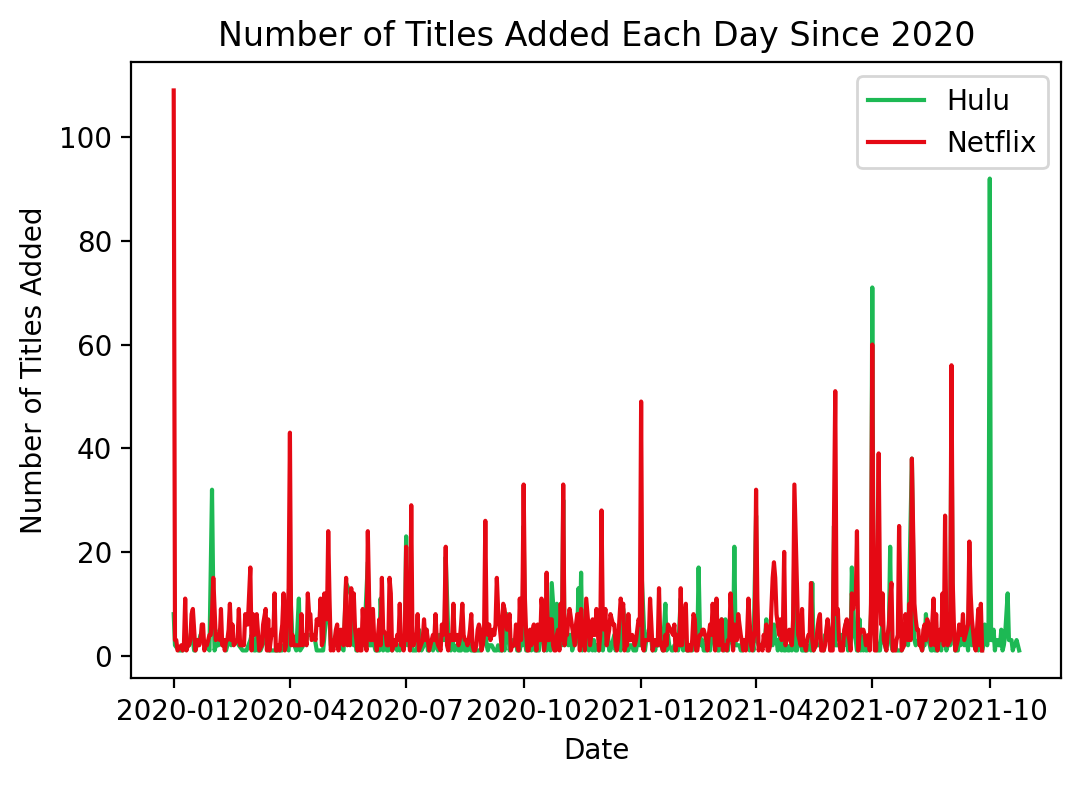

In [2]:
dfHuluClean = pd.read_csv('data/hulu_titles_modified.csv')
dfNetflixClean = pd.read_csv('data/netflix_titles_modified.csv')

dfHuluClean['date_added'] = pd.to_datetime(
    dfHuluClean['date_added'], errors='coerce')
dfNetflixClean['date_added'] = pd.to_datetime(
    dfNetflixClean['date_added'], errors='coerce')

dfHuluClean_2020 = dfHuluClean[dfHuluClean['date_added'] >= '2020-01-01']
dfNetflixClean_2020 = dfNetflixClean[dfNetflixClean['date_added']
                                     >= '2020-01-01']

hulu_titles_daily_count = dfHuluClean_2020.groupby(
    dfHuluClean_2020['date_added'].dt.date).size()
netflix_titles_daily_count = dfNetflixClean_2020.groupby(
    dfNetflixClean_2020['date_added'].dt.date).size()


fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(hulu_titles_daily_count.index,
        hulu_titles_daily_count.values, label='Hulu', color='#1DB954')
ax.plot(netflix_titles_daily_count.index,
        netflix_titles_daily_count.values, label='Netflix', color='#E50914')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Titles Added')
ax.set_title('Number of Titles Added Each Day Since 2020')
ax.legend()
plt.show()

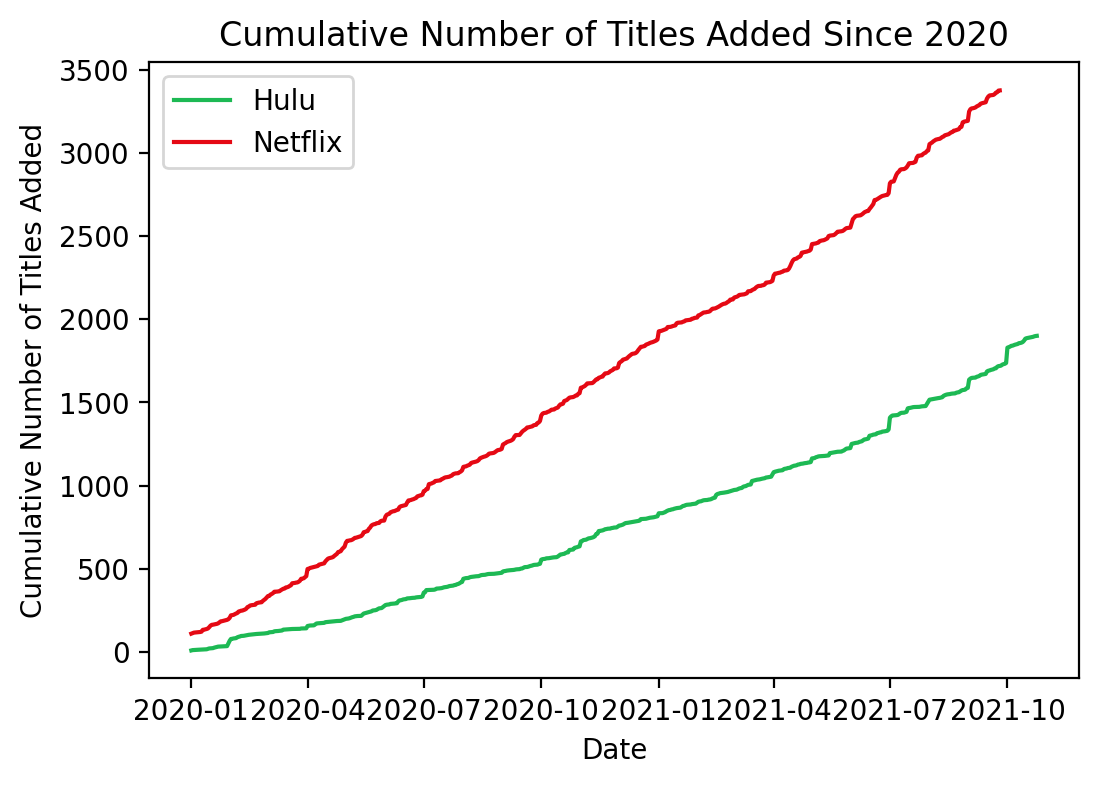

In [3]:
hulu_titles_cumulative_count = hulu_titles_daily_count.cumsum()
netflix_titles_cumulative_count = netflix_titles_daily_count.cumsum()

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(hulu_titles_cumulative_count.index,
        hulu_titles_cumulative_count.values, label='Hulu', color='#1DB954')
ax.plot(netflix_titles_cumulative_count.index,
        netflix_titles_cumulative_count.values, label='Netflix', color='#E50914')

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Number of Titles Added')
ax.set_title('Cumulative Number of Titles Added Since 2020')
ax.legend()
plt.show()

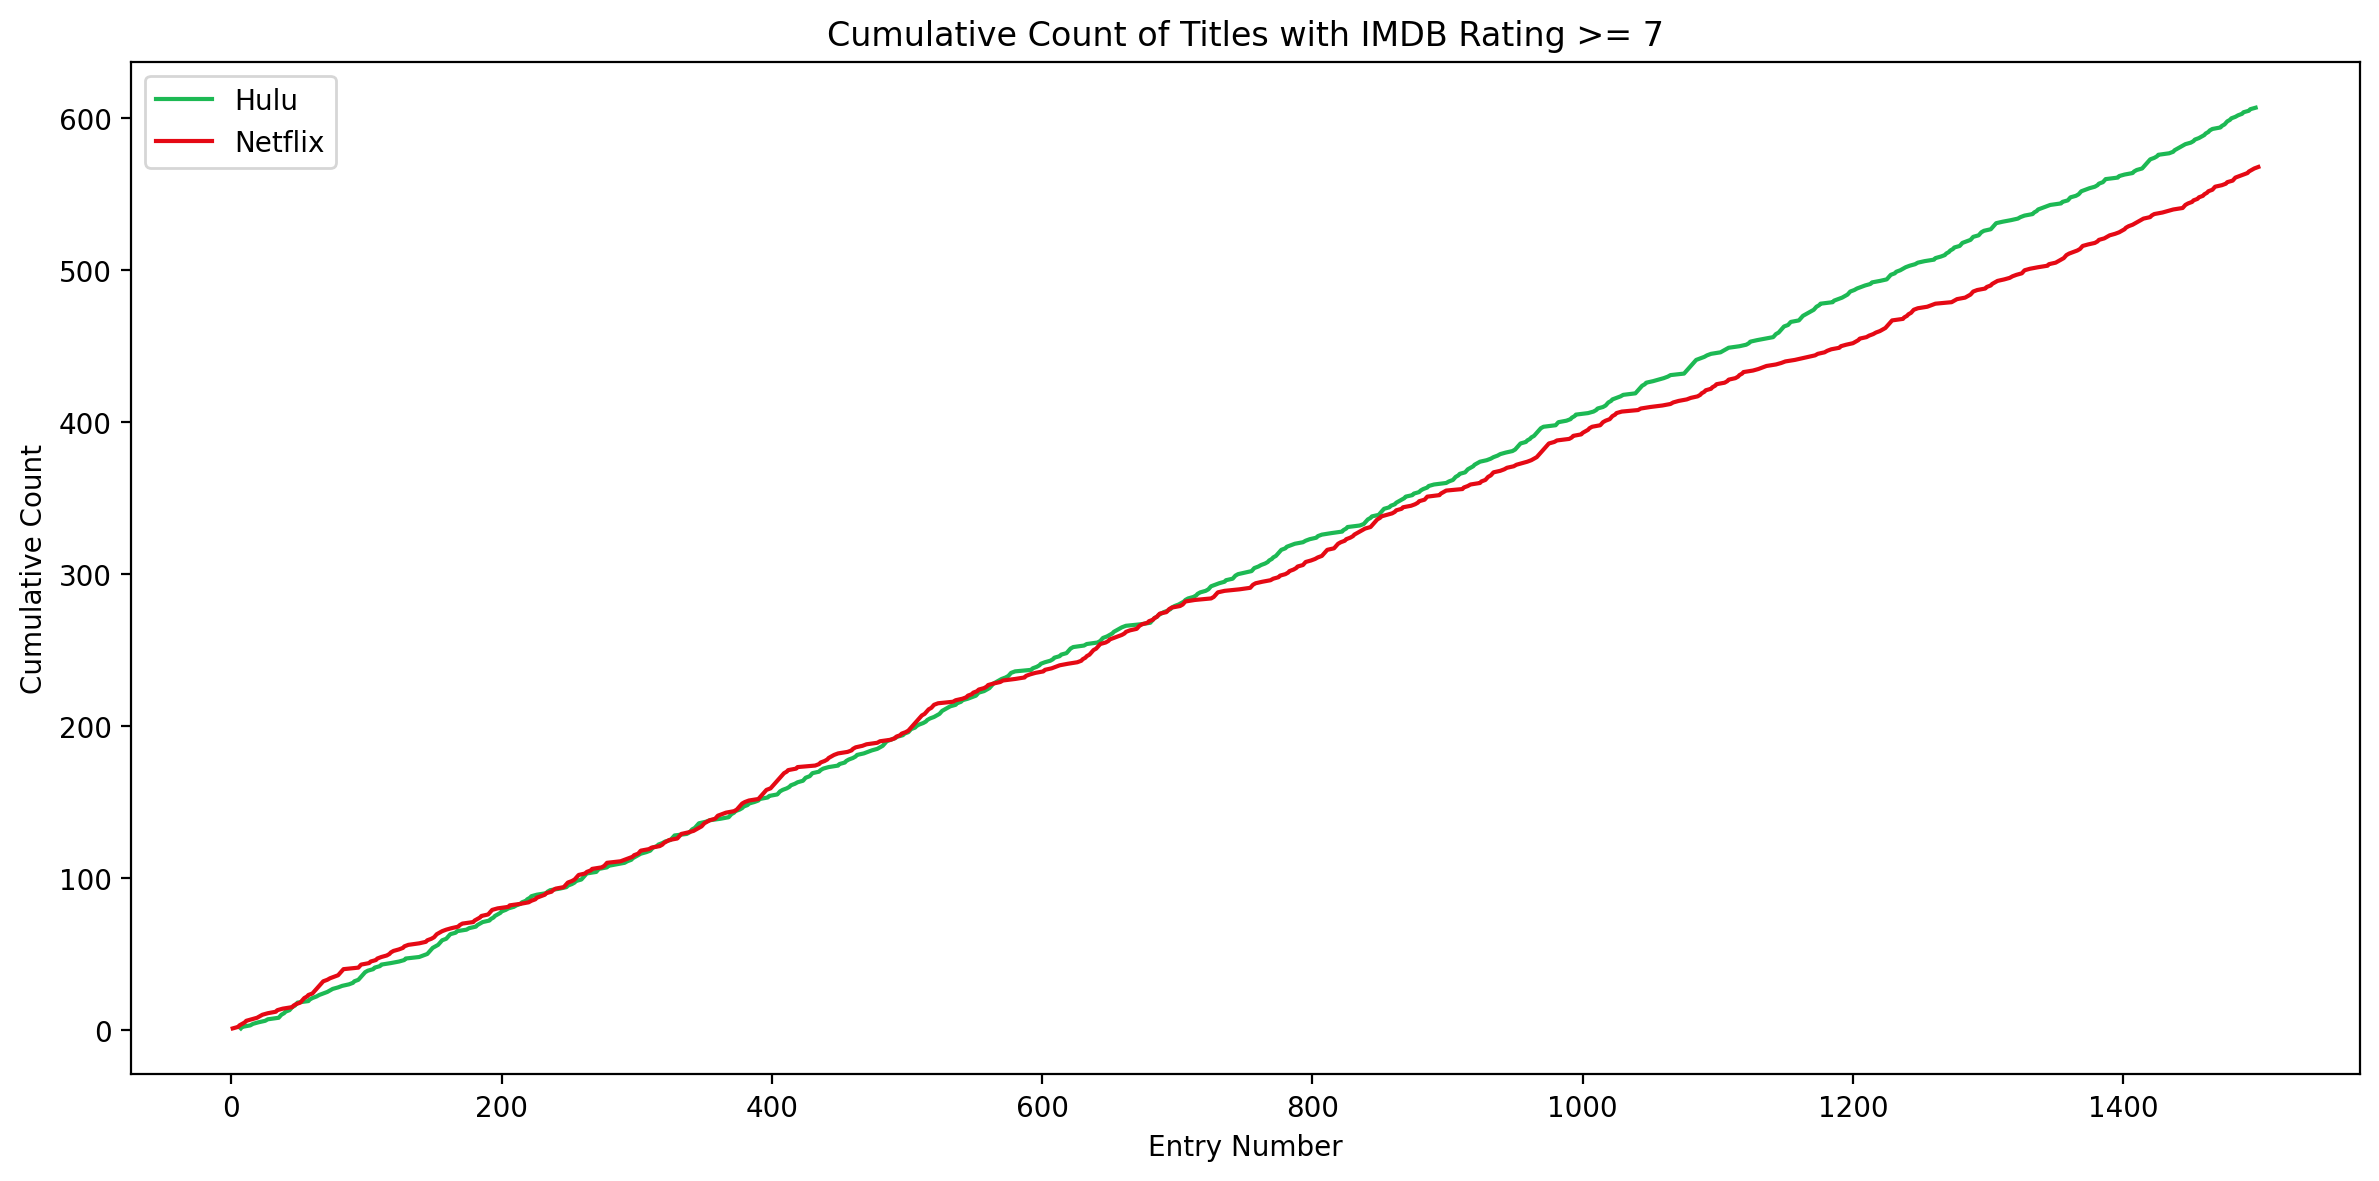

In [4]:
min_rating = 7

dfHulu1500 = pd.read_csv('data/hulu_1500.csv')
dfNetflix1500 = pd.read_csv('data/netflix_1500.csv')

dfHulu1500['date_added'] = pd.to_datetime(
    dfHulu1500['date_added'], errors='coerce')
dfNetflix1500['date_added'] = pd.to_datetime(
    dfNetflix1500['date_added'], errors='coerce')

dfHulu1500_filtered = dfHulu1500[dfHulu1500['IMDB_Rating'] >= min_rating].copy(
)
dfNetflix1500_filtered = dfNetflix1500[dfNetflix1500['IMDB_Rating'] >= min_rating].copy(
)

dfHulu1500_filtered.loc[:,
                        'cumulative_count'] = dfHulu1500_filtered['IMDB_Rating'].expanding().count()
dfNetflix1500_filtered.loc[:,
                           'cumulative_count'] = dfNetflix1500_filtered['IMDB_Rating'].expanding().count()

fig, ax = plt.subplots(figsize=(12, 6))

hulu_x = dfHulu1500_filtered.index + 1
hulu_y = dfHulu1500_filtered['cumulative_count']
ax.plot(hulu_x, hulu_y, color='#1DB954', label='Hulu')

netflix_x = dfNetflix1500_filtered.index + 1
netflix_y = dfNetflix1500_filtered['cumulative_count']
ax.plot(netflix_x, netflix_y, color='#E50914', label='Netflix')

ax.set_xlabel('Entry Number')
ax.set_ylabel('Cumulative Count')
ax.set_title(f'Cumulative Count of Titles with IMDB Rating >= {min_rating}')
ax.legend()

plt.tight_layout()
plt.show()

In [56]:
def inCheck(checklist, lst):
    if isinstance(lst, float):
        return False
    if isinstance(lst, type):
        return False
    for i in checklist:
        if i in lst:
            return True
    return False

countries = ['United Kingdom', 'India', 'Canada', 'France', 'Germany']
nCountryDic={}
hCountryDic={}

for i in countries:
    hCountryDic[i] = len(dfHulu1500[[inCheck([i], x) for x in dfHulu1500["country"]]])
    nCountryDic[i] = len(dfNetflix1500[[inCheck([i], x) for x in dfNetflix1500["country"]]])
print(hCountryDic, nCountryDic)


{'United Kingdom': 82, 'India': 0, 'Canada': 43, 'France': 15, 'Germany': 22} {'United Kingdom': 125, 'India': 105, 'Canada': 63, 'France': 59, 'Germany': 40}


/var/folders/6_/c0y366895zg6r2703nkq7cf00000gn/T/ipykernel_13378/527785825.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nCountryDic.keys(), color="white", font='Serif', size = 12, weight = "bold",rotation=0, path_effects=[
/var/folders/6_/c0y366895zg6r2703nkq7cf00000gn/T/ipykernel_13378/527785825.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticks_int, color="white", font='Serif', weight = "bold",rotation=0, path_effects=[


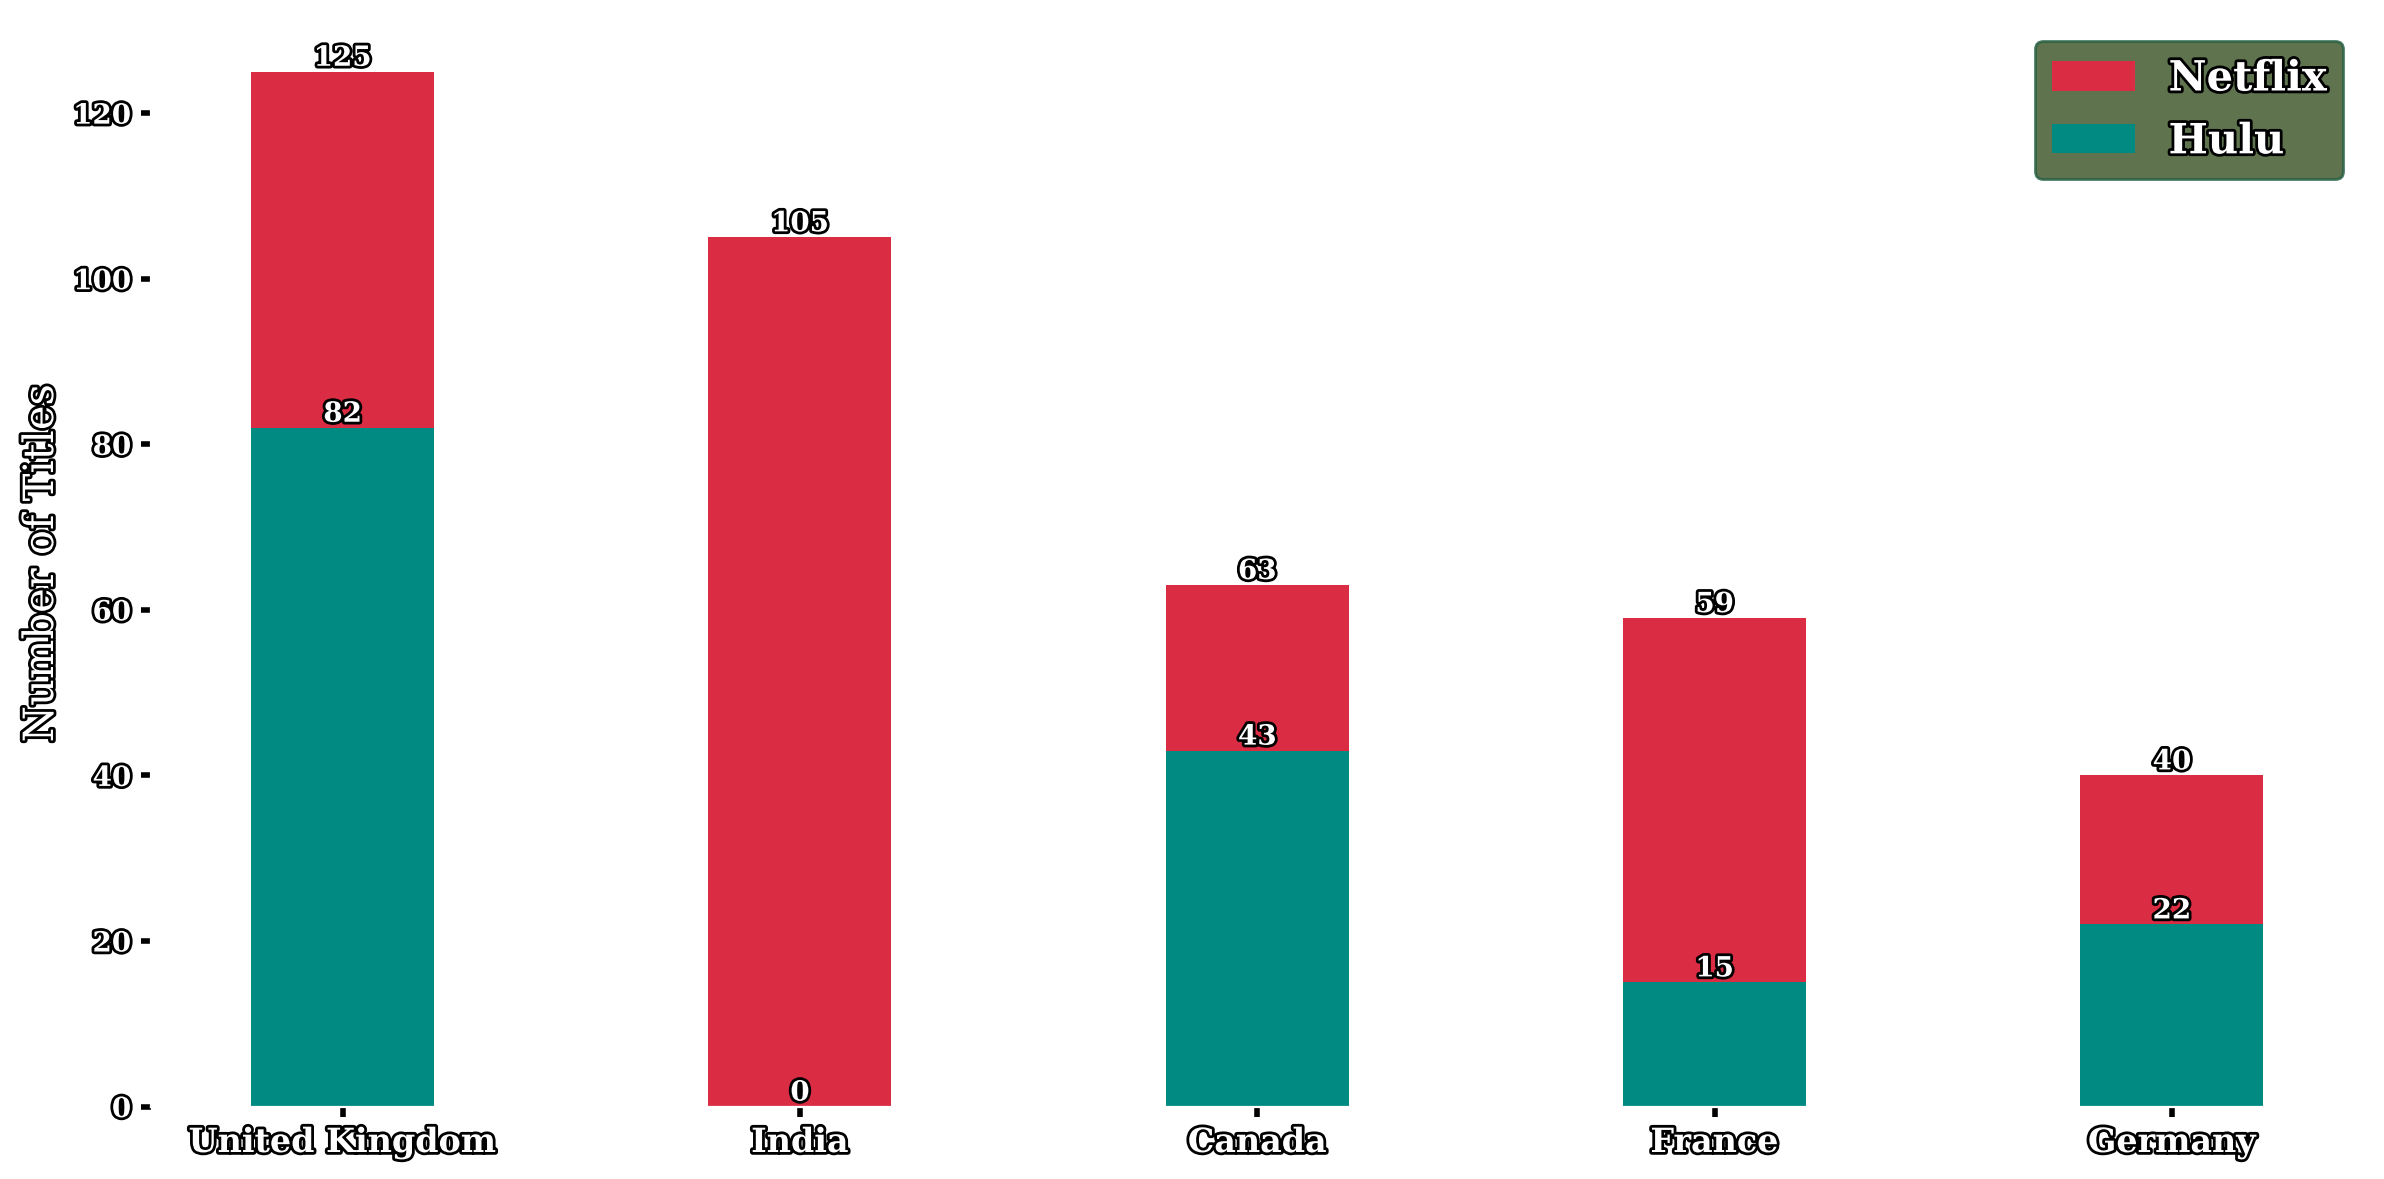

In [122]:
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.4
bars2 = ax.bar(nCountryDic.keys(), nCountryDic.values(),
               width=width, label='Netflix', color='#da2c43')#edgecolor="#f7b512")
bars1 = ax.bar(hCountryDic.keys(), hCountryDic.values(),
               width=width, label='Hulu', color='#018a82') #edgecolor="#f7b512")

#ax.set_title('Number of Titles from Top 5 International Countries',color="white", font='Serif', size=16, path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

# ax.set_xlabel('Country', color="white", font='Serif', size=12, path_effects=[
#               plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

ax.set_ylabel('Number of Titles', color="white", font='Serif', size=15, path_effects=[
              plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])


legend = ax.legend(facecolor="#375222", edgecolor="#205c40", prop={
                   'size': 15, 'weight': 'semibold', 'family': 'Serif'})

for text in legend.get_texts():
    text.set_color('white')
    text.set_path_effects([path_effects.Stroke(
        linewidth=2, foreground='black'), path_effects.Normal()])

ax.tick_params(axis='x', colors='black', width = 2)
ax.tick_params(axis='y', colors='black', width = 2)
ax.set_xticklabels(nCountryDic.keys(), color="white", font='Serif', size = 12, weight = "bold",rotation=0, path_effects=[
                   plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])
yticks_int = [int(y) for y in ax.get_yticks()]
ax.set_yticklabels(yticks_int, color="white", font='Serif', weight = "bold",rotation=0, path_effects=[
                   plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', color='white', fontsize=10,
            fontweight='bold', font='Serif', path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', color='white', fontsize=10,
            fontweight='bold', font='Serif', path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

fig.patch.set_facecolor('None')
ax.set_facecolor('None')

ax.spines['top'].set_color("#f7b512")
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_color("white")
# ax.spines['bottom'].set_visible(False)

ax.spines['left'].set_color("white")
#ax.spines['left'].set_visible(False)

ax.spines['right'].set_color("#f7b512")
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#USF hex:
#f7b512
#75787b
#205c40


In [7]:
def notInCheck(checklist, lst):
    # Check if lst is not a float and is a list
    # if not isinstance(lst, list):
    #     return False
    if isinstance(lst, float):
        return False
    
    # Check if any element in checklist is not in lst
    res= True
    for i in checklist:
        if i in lst:
            res = False
        else:
            res = res & True
    
    return res

In [8]:
print(dfHulu1500[[notInCheck( ['United States'], i) for i in dfHulu1500["country"]]]["country"].count(), 
dfNetflix1500[[notInCheck( ['United States'], i) for i in dfNetflix1500["country"]]]["country"].count())

113 536


/var/folders/6_/c0y366895zg6r2703nkq7cf00000gn/T/ipykernel_13378/3443944825.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), color="white", font='Serif', rotation=0, path_effects=[
/var/folders/6_/c0y366895zg6r2703nkq7cf00000gn/T/ipykernel_13378/3443944825.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(international_counts['Platform'], color="white", font='Serif', rotation=0, path_effects=[


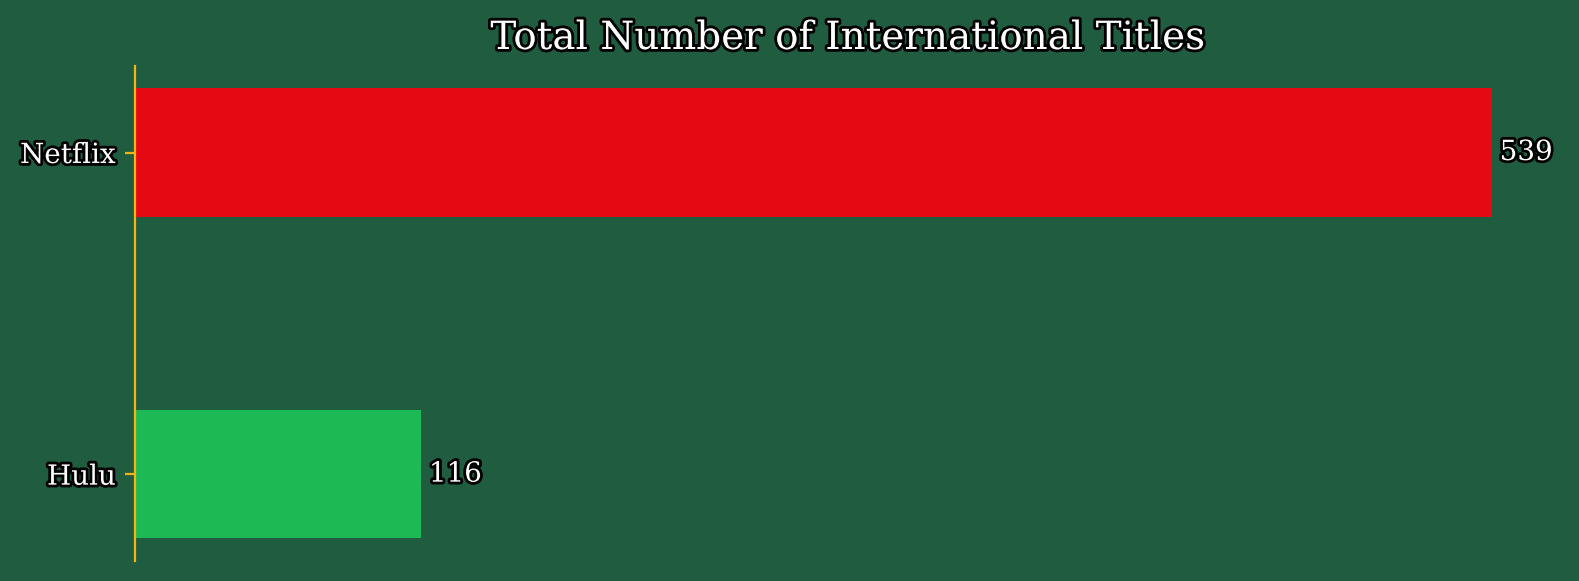

In [129]:
hulu_international_count = dfHulu1500[[notInCheck(
    ['United States'], i) for i in dfHulu1500["country"]]]["country"].count()
netflix_international_count = dfNetflix1500[[notInCheck(
    ['United States'], i) for i in dfNetflix1500["country"]]]["country"].count()
# hulu_international_count =  dfHulu1500[dfHulu1500['country'] != 'United States']["country"].count()
# netflix_international_count = dfNetflix1500[dfHulu1500['country'] != 'United States']["country"].count()

international_counts = pd.DataFrame({
    'Platform': ['Hulu', 'Netflix'],
    'Count': [hulu_international_count, netflix_international_count]
})

fig, ax = plt.subplots(figsize=(8, 3))
bars = ax.barh(international_counts['Platform'], international_counts['Count'], height=[
    0.4, 0.4], color=['#1DB954', '#E50914'])

ax.set_title('Total Number of International Titles',color="white", font='Serif', size=14, path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])


ax.tick_params(axis='x', which='both', bottom=False,
               top=False, labelbottom=False)
ax.tick_params(axis='y', colors='#f7b512')
ax.set_xticklabels(ax.get_xticks(), color="white", font='Serif', rotation=0, path_effects=[
                   plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])
ax.set_yticklabels(international_counts['Platform'], color="white", font='Serif', rotation=0, path_effects=[
                   plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

for bar in bars:
    xval = bar.get_width() + 3
    color = 'white'
    text = ax.text(xval, bar.get_y() + bar.get_height()/2.0, int(xval), va='center',
                   ha='left', color=color, fontsize=10, fontweight='normal', font='Serif')
    text.set_path_effects([path_effects.Stroke(
        linewidth=2, foreground='black'), path_effects.Normal()])

fig.patch.set_facecolor('#205c40')
ax.set_facecolor('#205c40')

ax.spines['top'].set_color("#f7b512")
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_color("#f7b512")
ax.spines['bottom'].set_visible(False)

ax.spines['left'].set_color("#f7b512")
# ax.spines['left'].set_visible(False)

ax.spines['right'].set_color("#f7b512")
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

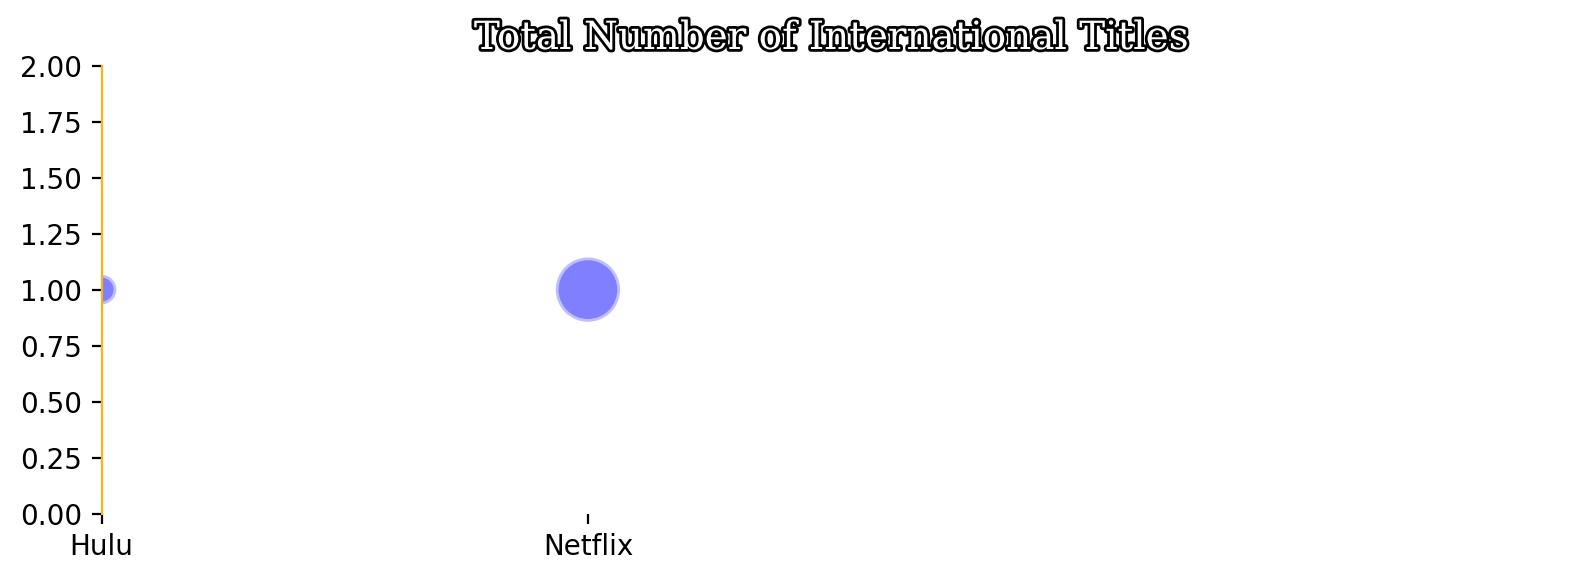

In [128]:
hulu_international_count = dfHulu1500[[notInCheck(
    ['United States'], i) for i in dfHulu1500["country"]]]["country"].count()
netflix_international_count = dfNetflix1500[[notInCheck(
    ['United States'], i) for i in dfNetflix1500["country"]]]["country"].count()
# hulu_international_count =  dfHulu1500[dfHulu1500['country'] != 'United States']["country"].count()
# netflix_international_count = dfNetflix1500[dfHulu1500['country'] != 'United States']["country"].count()

international_counts = pd.DataFrame({
    'Platform': ['Hulu', 'Netflix'],
    'Count': [hulu_international_count, netflix_international_count]
})

fig, ax = plt.subplots(figsize=(8, 3))
x= international_counts["Platform"]
scatter = ax.scatter(x, [1, 1], s=international_counts["Count"], alpha=0.5, c='blue', edgecolors='w', linewidth=2)
# bars = ax.scatter(international_counts['Platform'], international_counts['Count'], height=[
#     0.4, 0.4], color=['#1DB954', '#E50914'])
# for i, label in enumerate(labels):
#     ax.text(x[i], 1, label, fontsize=12, ha='center', va='center', color='black')

ax.set_title('Total Number of International Titles',color="white", font='Serif', size=14, path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])
ax.set_xlim(0, 3)
ax.set_ylim(0, 2)

# ax.tick_params(axis='x', which='both', bottom=False,
#                top=False, labelbottom=False)
# ax.tick_params(axis='y', colors='#f7b512')
# ax.set_xticklabels(ax.get_xticks(), color="white", font='Serif', rotation=0, path_effects=[
#                    plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])
# ax.set_yticklabels(international_counts['Platform'], color="white", font='Serif', rotation=0, path_effects=[
#                    plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

# for bar in bars:
#     xval = bar.get_width() + 3
#     color = 'white'
#     text = ax.text(xval, bar.get_y() + bar.get_height()/2.0, int(xval), va='center',
#                    ha='left', color=color, fontsize=10, fontweight='normal', font='Serif')
#     text.set_path_effects([path_effects.Stroke(
#         linewidth=2, foreground='black'), path_effects.Normal()])

fig.patch.set_facecolor('None')
ax.set_facecolor('None')

ax.spines['top'].set_color("#f7b512")
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_color("#f7b512")
ax.spines['bottom'].set_visible(False)

ax.spines['left'].set_color("#f7b512")
# ax.spines['left'].set_visible(False)

ax.spines['right'].set_color("#f7b512")
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [52]:
dfDocChecklist = pd.read_csv('data/Educational_Categories.csv')

huluEduChecklist = dfDocChecklist['Hulu'].dropna().tolist()
netflixEduChecklist = dfDocChecklist['Netflix'].dropna().tolist()

def inCheck(checklist, lst):
    if isinstance(lst, float):
        return False
    if isinstance(lst, type):
        return False
    for i in checklist:
        if i in lst:
            return True
    return False

dfHulu_edu = dfHulu1500[[inCheck(huluEduChecklist, i) for i in dfHulu1500["listed_in"]]]
dfNetflix_edu = dfNetflix1500[[inCheck(netflixEduChecklist, i) for i in dfNetflix1500["listed_in"]]]

hulu_edu_above_7 = len(dfHulu_edu[dfHulu_edu['IMDB_Rating'] > 7])
netflix_edu_above_7 = len(dfNetflix_edu[dfNetflix_edu['IMDB_Rating'] > 7])

print(len(dfHulu_edu), len(dfNetflix_edu))
print(len(dfHulu_edu[dfHulu_edu['IMDB_Rating'] > 7]), len(dfNetflix_edu[dfNetflix_edu['IMDB_Rating'] > 7]))


282 163
149 75


/var/folders/6_/c0y366895zg6r2703nkq7cf00000gn/T/ipykernel_13378/3170671431.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), color="white", font='Serif', rotation=0, path_effects=[
/var/folders/6_/c0y366895zg6r2703nkq7cf00000gn/T/ipykernel_13378/3170671431.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(edu_counts['Platform'], color="white", font='Serif', rotation=0,


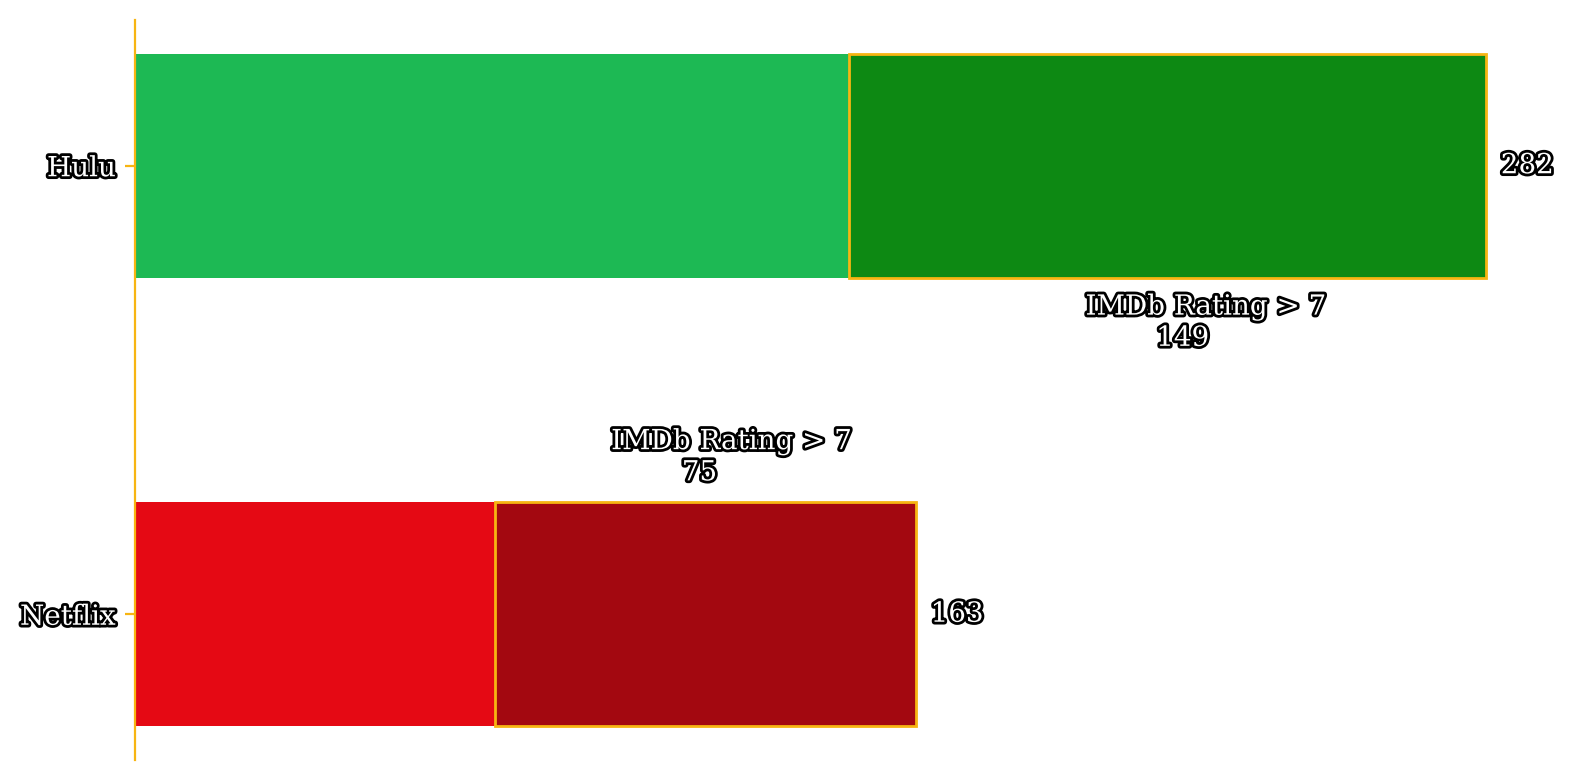

In [73]:
hulu_edu_count = len(dfHulu_edu)
netflix_edu_count = len(dfNetflix_edu)

edu_counts = pd.DataFrame({
    'Platform': ['Hulu', 'Netflix'],
    'Count': [hulu_edu_count, netflix_edu_count],
    'Color': ['#1DB954', '#E50914']
})

edu_counts = edu_counts.sort_values(by='Count', ascending=True)

hulu_edu_above_7 = len(dfHulu_edu[dfHulu_edu['IMDB_Rating'] > 7])
netflix_edu_above_7 = len(dfNetflix_edu[dfNetflix_edu['IMDB_Rating'] > 7])

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(edu_counts['Platform'], edu_counts['Count'], color=edu_counts['Color'], height=0.5)

colors = {
    'Hulu': '#0d8913',
    'Netflix': '#a30810'
}

for bar, platform in zip(bars, edu_counts['Platform']):
    count_above_7 = hulu_edu_above_7 if platform == 'Hulu' else netflix_edu_above_7
    count_below_7 = edu_counts[edu_counts['Platform'] == platform]['Count'].values[0] - count_above_7
    ax.barh(platform, count_below_7, color=colors[platform], edgecolor='#f7b512', height=0.5, left=count_above_7)
    xpos = count_above_7 + count_below_7/3 + 5 if platform == 'Hulu' else count_above_7 + count_below_7/3 - 5
    ypos = bar.get_y() - 0.1 if platform == 'Hulu' else bar.get_y() + 0.6
    textRate = f"IMDb Rating > 7 \n        {int(count_above_7)}"
    color = 'white'
    text1 = ax.text(xpos, ypos, textRate, va='center', ha='left', color=color, fontsize=10, fontweight='normal', font = 'Serif')
    text1.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])


for bar in bars:
    xval = bar.get_width()
    color = 'white'
    text2 = ax.text(xval +3, bar.get_y() + bar.get_height()/2.0, int(xval), va='center', ha='left', color=color, fontsize=10, fontweight='normal', font = 'Serif')
    text2.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])


ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.tick_params(axis='y', colors='#f7b512')
ax.set_xticklabels(ax.get_xticks(), color="white", font='Serif', rotation=0, path_effects=[
                   plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])
ax.set_yticklabels(edu_counts['Platform'], color="white", font='Serif', rotation=0, 
path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])
#ax.set_title('Total Number of Educational Titles - High Rated Content Highlighted',color="white", font='Serif', size=14,weight = "bold",path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

# ax.set_xlabel('Number of Titles')
# ax.set_ylabel('Platform')

fig.patch.set_facecolor('None')
ax.set_facecolor('None')
"#205c40"

ax.spines['top'].set_color("#f7b512")
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_color("#f7b512")
ax.spines['bottom'].set_visible(False)

ax.spines['left'].set_color("#f7b512")
# ax.spines['left'].set_visible(False)

ax.spines['right'].set_color("#f7b512")
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


/var/folders/86/c2gz31wn29b2r_53d_q3g3hc0000gn/T/ipykernel_25051/3811810613.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  txt.set_text(f"{hulu_age_group_counts[i]} ({txt.get_text()})")
/var/folders/86/c2gz31wn29b2r_53d_q3g3hc0000gn/T/ipykernel_25051/3811810613.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  txt.set_text(f"{netflix_age_group_counts[i]} ({txt.get_text()})")


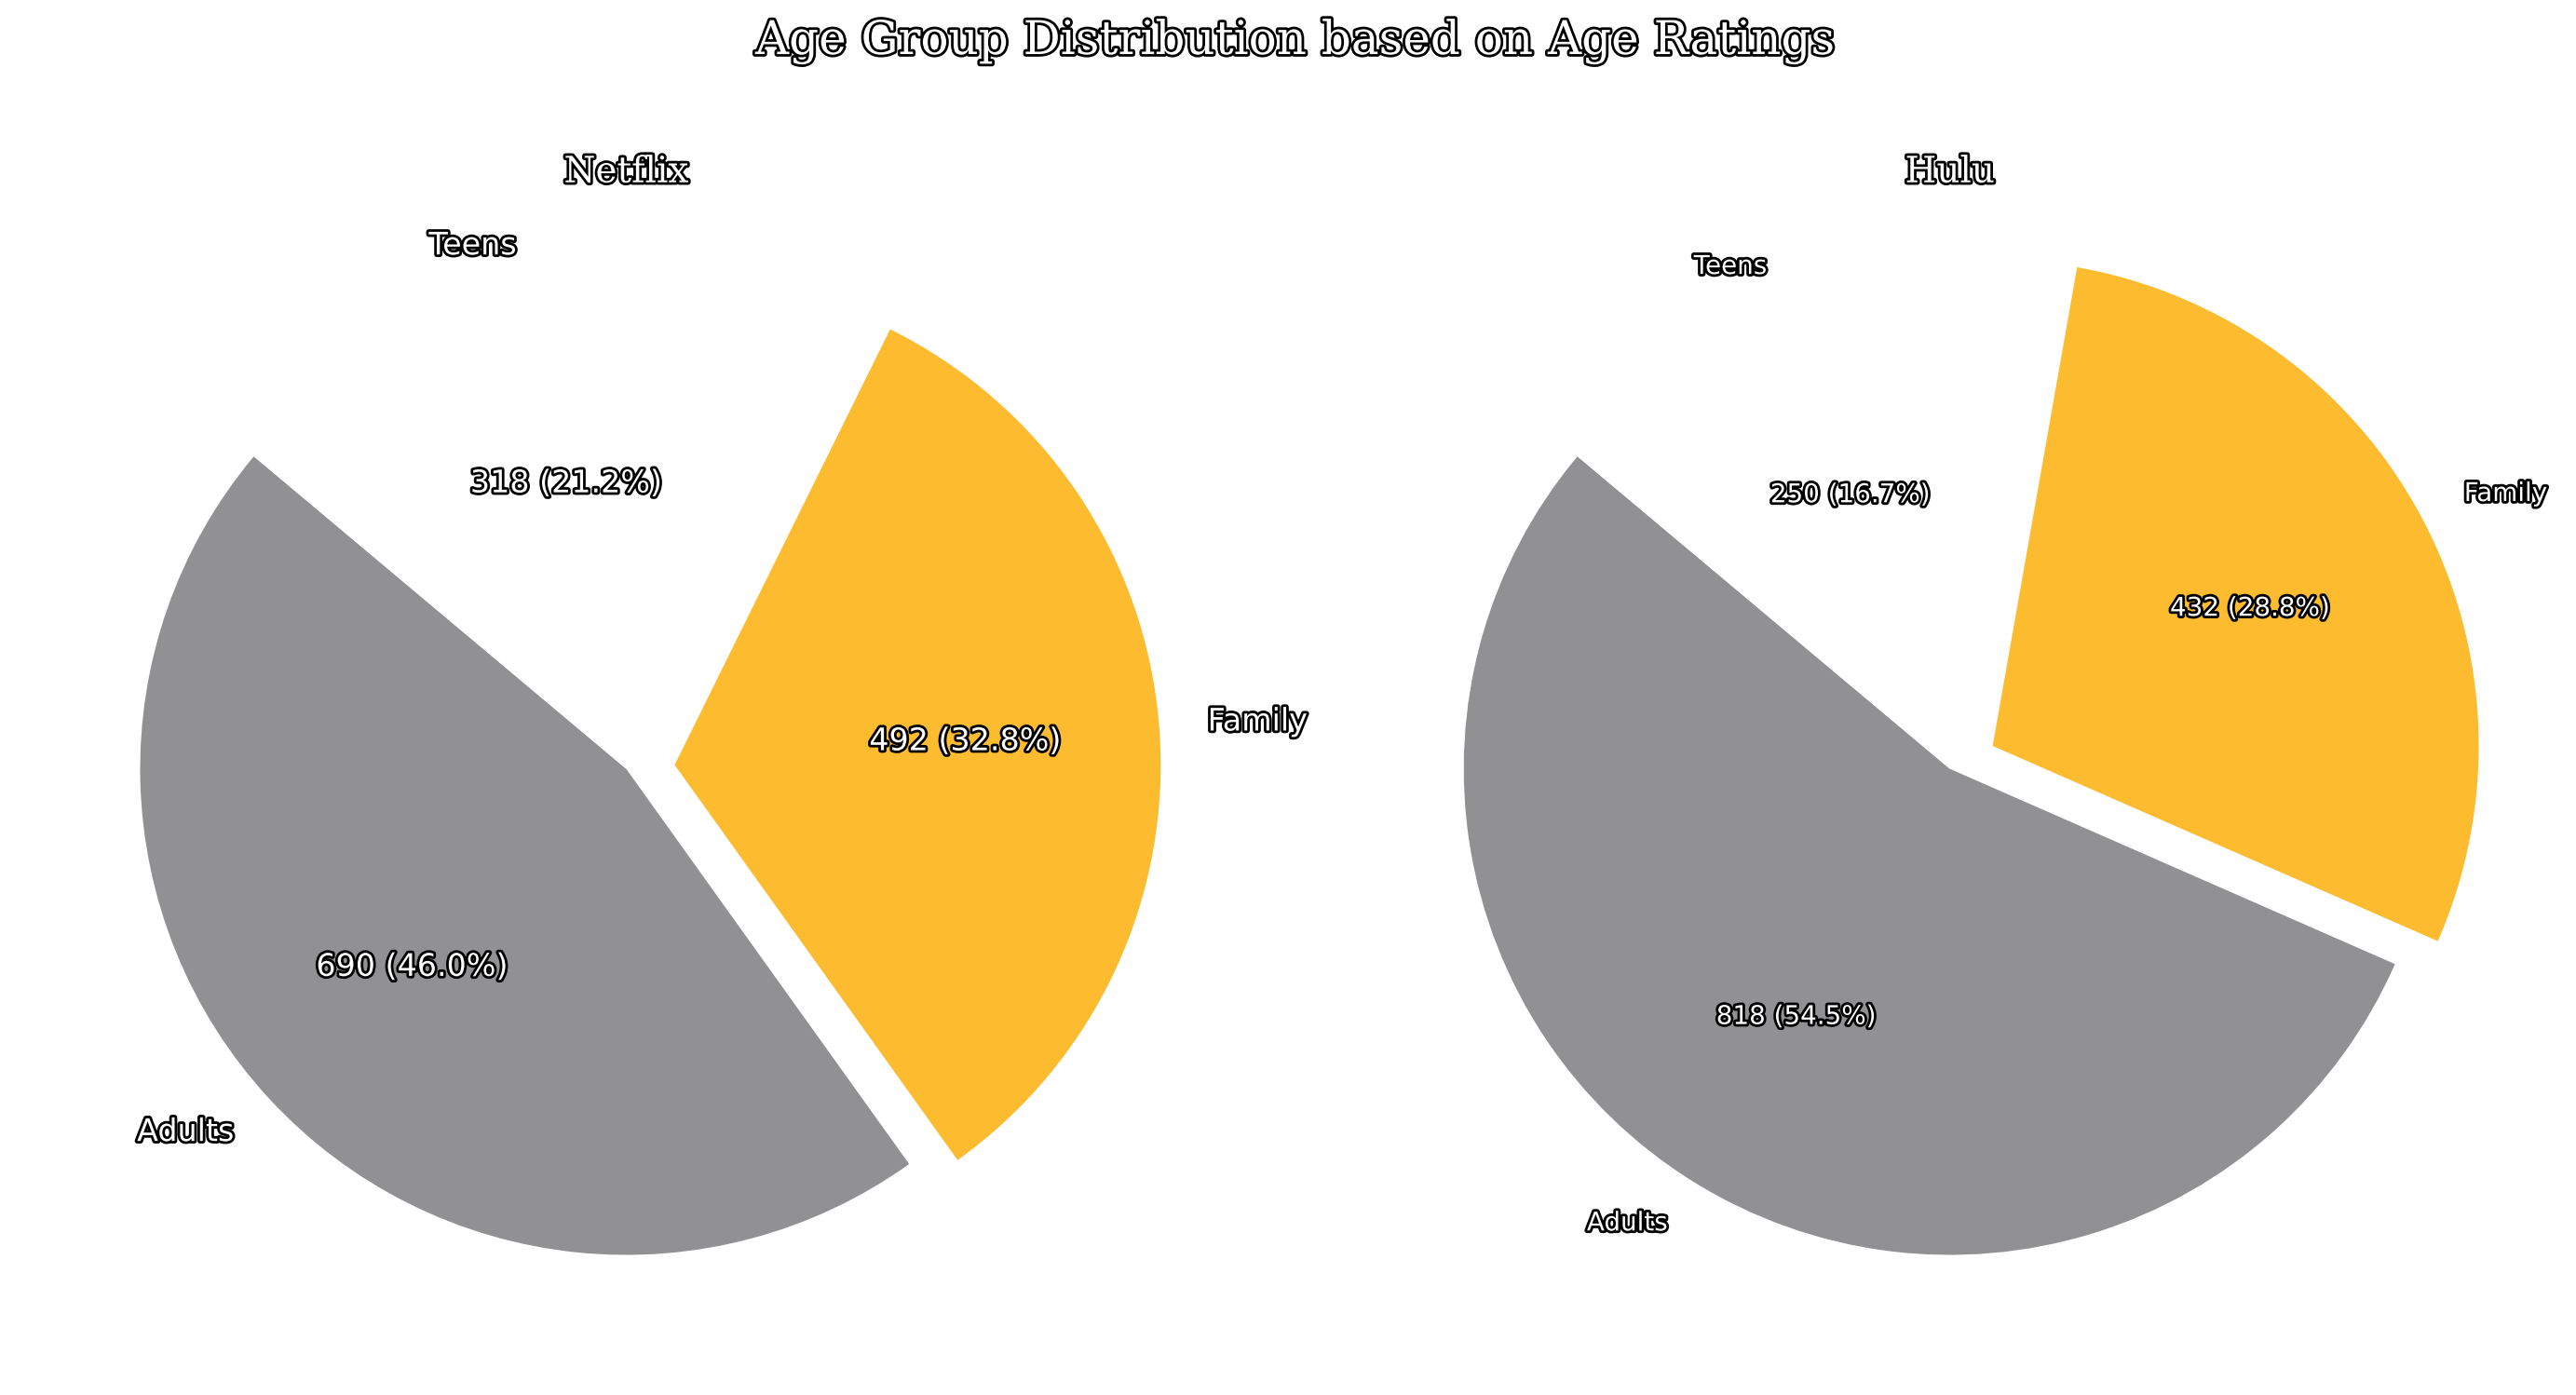

In [165]:
pie_colors = ['#919194', '#FDBB30', '#FFFFFF']
explode = [0, 0.1, 0]
family_friendly = ['G', 'PG', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-PG']
teens = ['PG-13', 'TV-14']
adults = ['R', 'NC-17', 'TV-MA']


def classify_age_group(rating):
    if inCheck(family_friendly, rating):
        return 'Family'
    elif inCheck(teens, rating):
        return 'Teens'
    elif inCheck(adults, rating):
        return 'Adults'
    else:
        return 'Adults'


dfHulu1500['Age_group'] = dfHulu1500['rating'].apply(classify_age_group)
dfNetflix1500['Age_group'] = dfNetflix1500['rating'].apply(classify_age_group)

hulu_age_group_counts = dfHulu1500['Age_group'].value_counts()
netflix_age_group_counts = dfNetflix1500['Age_group'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

hulu_pie, hulu_texts, hulu_autotexts = axes[1].pie(
    hulu_age_group_counts, labels=hulu_age_group_counts.index, explode=explode, autopct='%1.1f%%', startangle=140, colors=pie_colors
)
axes[1].set_title('Hulu', y=0.97, color="white", font='Serif', size=14, path_effects=[
                  plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

for text in hulu_texts + hulu_autotexts:
    text.set_color('white')
    text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

for i, txt in enumerate(hulu_autotexts):
    txt.set_text(f"{hulu_age_group_counts[i]} ({txt.get_text()})")

netflix_pie, netflix_texts, netflix_autotexts = axes[0].pie(
    netflix_age_group_counts, labels=netflix_age_group_counts.index, explode=explode, autopct='%1.1f%%', startangle=140, colors=pie_colors
)
axes[0].set_title('Netflix', y=0.97, color="white", font='Serif', size=14, path_effects=[
                  plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

for text in netflix_texts + netflix_autotexts:
    text.set_color('white')
    text.set_size(12)
    text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

for i, txt in enumerate(netflix_autotexts):
    txt.set_text(f"{netflix_age_group_counts[i]} ({txt.get_text()})")

fig.suptitle('Age Group Distribution based on Age Ratings', color="white", font='Serif', size=18, path_effects=[
                  plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])
fig.patch.set_facecolor('none')

plt.tight_layout()
plt.show()

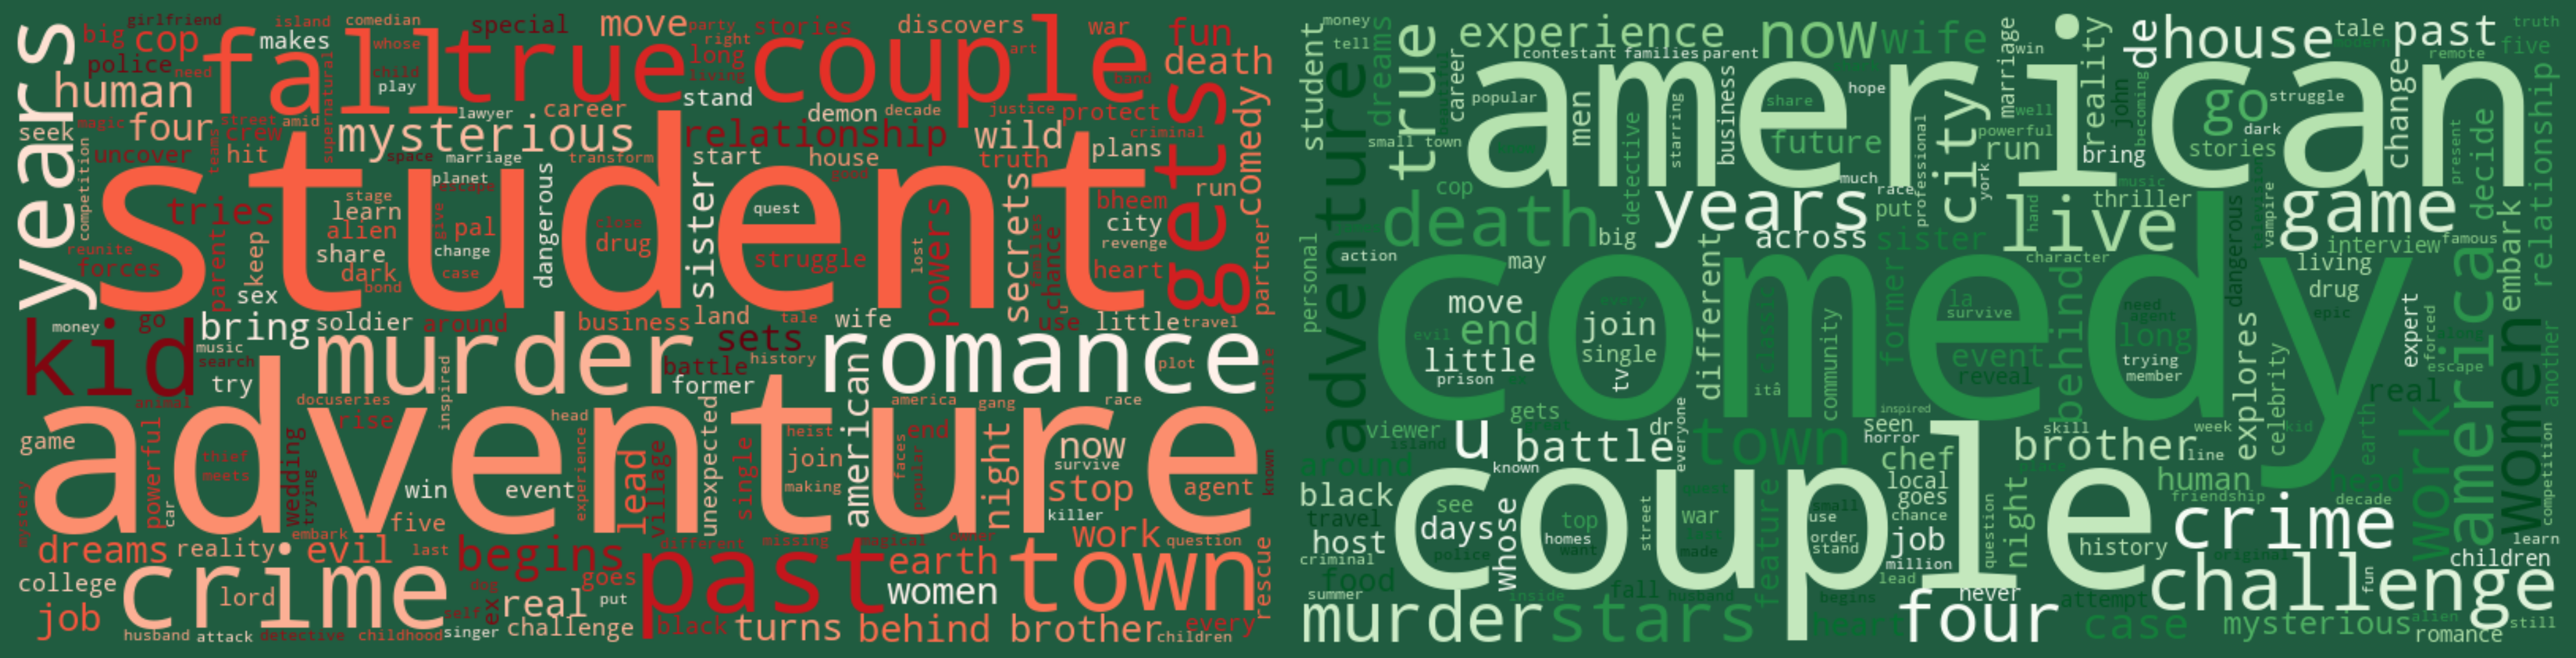

In [189]:
from wordcloud import WordCloud, STOPWORDS

dfHulu1500['description'] = dfHulu1500['description'].str.strip().str.lower()
dfNetflix1500['description'] = dfNetflix1500['description'].str.strip().str.lower()

hulu_text = dfHulu1500['description'].str.cat(sep=' ')
netflix_text = dfNetflix1500['description'].str.cat(sep=' ')

stopwords = set(STOPWORDS).union(set([
    'series', 'film', 'movie', 'documentary', 'show', 'story', 'season', 'episode',
    'based', 'life', 'must', 'follow', 'follows', 'find', 'journey', 'sequel',
    'discover', 'learns', 'navigate', 'will', 'new', 'take', 'make', 'team', 'lives',
    'year', 'time', 'two', 'one', 'three', 'come', 'set', 'help', 'back', 'first', 'love',
    'face', 'finds', 'man', 'woman', 'son', 'daughter', 'father', 'mother', 'home', 'turn', 'plan',
    'become', 'best', 'returns', 'â', 'ã', 'é', 'a', 's', 't', 'e', 'i', 'o',
    'n', 'r', 'c', 'p', 'm', 'l', 'd', 'b', 'star', 'day', 'takes', 'girl', 'boy', 'save',
    'teen', 'power', 'secret', 'father', 'dream', 'comes', 'fight', 'time', 'together',
    'explore', 'meet', 'way', 'country', 'people', 'drama', 'look', 'part', 'force',
    'mission', 'high', 'old', 'soon', 'becomes', 'begin', 'young', 'friend', 'family', 'friends',
    'world', 'group', 'school'
]))


hulu_wordcloud = WordCloud(
    width=800, height=400, background_color='#205c40', colormap='Greens', stopwords=stopwords,)
hulu_wordcloud.generate(hulu_text)

netflix_wordcloud = WordCloud(
    width=800, height=400, background_color='#205c40', colormap='Reds', stopwords=stopwords,)
netflix_wordcloud.generate(netflix_text)

fig, axes = plt.subplots(1, 2, figsize=(20, 12))

axes[1].imshow(hulu_wordcloud, interpolation='bilinear')
# axes[1].set_title('Hulu', y=1.05, color="#1DB954", font='Serif', size=28, path_effects=[
#                   plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])
axes[1].axis('off')

axes[0].imshow(netflix_wordcloud, interpolation='bilinear')
# axes[0].set_title('Netflix', y=1.05, color="#e50914", font='Serif', size=28, path_effects=[
#                   plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])
axes[0].axis('off')

fig.patch.set_facecolor('#205c40')
# fig.suptitle('Word Clouds', y=0.72, color='white', font='Serif', size=28, path_effects=[
#                   plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

plt.tight_layout()
plt.show()